In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('salary_prediction_data.csv')
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [3]:
 df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [6]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

<Axes: xlabel='Salary', ylabel='Count'>

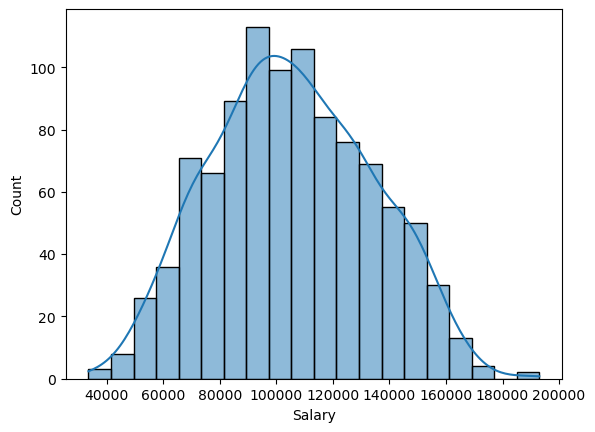

In [8]:
sns.histplot(df['Salary'],kde=True)

<Axes: >

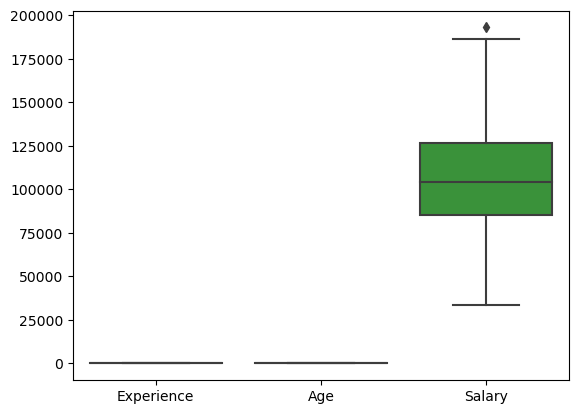

In [9]:
sns.boxplot(df)

In [10]:
q1=df['Salary'].quantile(0.25)
q3=df['Salary'].quantile(0.75)
print(q1,q3)

85032.14151742366 126804.04752400877


In [11]:
IQR = q3-q1
print(IQR)

41771.90600658511


In [12]:
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print(upper,lower)

189461.90653388645 22374.282507546


In [14]:
df = df[(df['Salary']>lower) & (df['Salary']< upper)]

In [16]:
df.shape

(999, 7)

In [19]:
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


<Axes: >

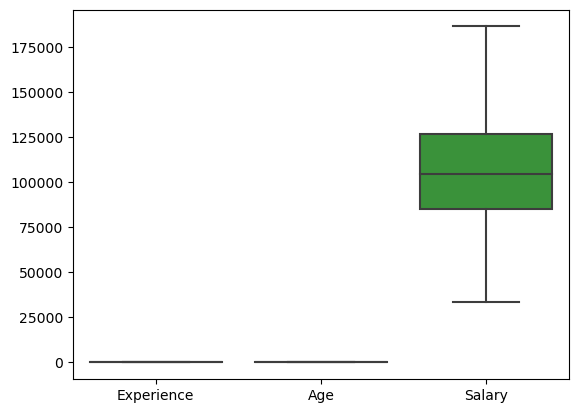

In [17]:
sns.boxplot(df)

<Axes: xlabel='Education', ylabel='Salary'>

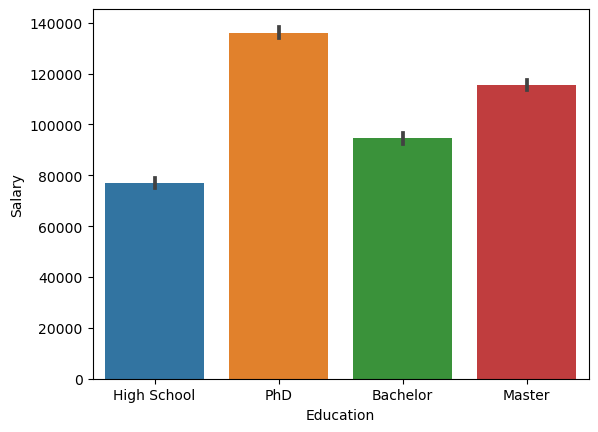

In [23]:
sns.barplot(data=df,x='Education',y='Salary')

<Axes: xlabel='Experience', ylabel='Salary'>

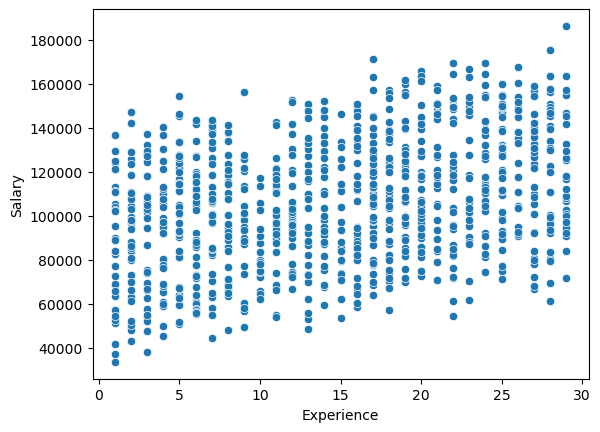

In [24]:
sns.scatterplot(data=df,x='Experience',y='Salary')

In [25]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10488\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Experience,Age,Salary
Experience,1.000000,0.043828,0.341685
Age,0.043828,1.000000,-0.055880
Salary,0.341685,-0.055880,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_10488\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

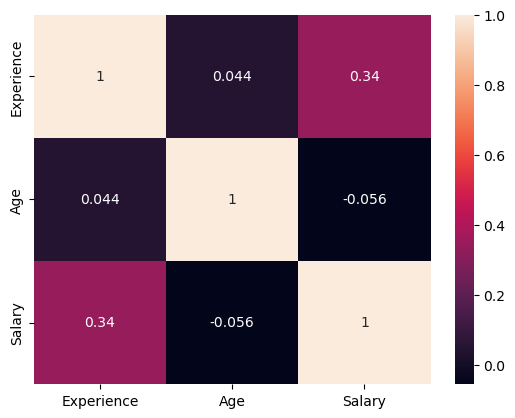

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [29]:
df['Education'].value_counts()

High School    255
Bachelor       253
PhD            250
Master         241
Name: Education, dtype: int64

In [30]:
df['Location'].value_counts()

Rural       345
Suburban    344
Urban       310
Name: Location, dtype: int64

In [31]:
df['Job_Title'].value_counts()

Director    274
Analyst     255
Manager     241
Engineer    229
Name: Job_Title, dtype: int64

In [32]:
df['Gender'].value_counts()

Male      516
Female    483
Name: Gender, dtype: int64

In [33]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,1,84620.053665
1,PhD,11,Suburban,Director,59,1,142591.255894
2,Bachelor,28,Suburban,Manager,61,0,97800.255404
3,High School,29,Rural,Director,45,1,96834.671282
4,PhD,25,Urban,Analyst,26,0,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,0,64683.389864
996,High School,24,Urban,Engineer,30,0,74468.205020
997,Master,18,Rural,Analyst,44,1,98207.026024
998,Bachelor,27,Suburban,Director,31,0,108544.922720


In [34]:
df['Education'].value_counts()

High School    255
Bachelor       253
PhD            250
Master         241
Name: Education, dtype: int64

In [35]:
df['Education'] = df['Education'].map({'High School':1,'Bachelor':2,'Master':3,'PhD':4})
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,Urban,Manager,63,1,84620.053665
1,4,11,Suburban,Director,59,1,142591.255894
2,2,28,Suburban,Manager,61,0,97800.255404
3,1,29,Rural,Director,45,1,96834.671282
4,4,25,Urban,Analyst,26,0,132157.786175
...,...,...,...,...,...,...,...
995,1,8,Suburban,Analyst,25,0,64683.389864
996,1,24,Urban,Engineer,30,0,74468.205020
997,3,18,Rural,Analyst,44,1,98207.026024
998,2,27,Suburban,Director,31,0,108544.922720


In [37]:
Location_dummy = pd.get_dummies(df['Location'])
Location_dummy

,Rural,Suburban,Urban
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
995,0,1,0
996,0,0,1
997,1,0,0
998,0,1,0


In [38]:
Job_Title_dummy = pd.get_dummies(df['Job_Title'])
Job_Title_dummy

,Analyst,Director,Engineer,Manager
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
995,1,0,0,0
996,0,0,1,0
997,1,0,0,0
998,0,1,0,0


In [40]:
df = pd.concat([df,Location_dummy,Job_Title_dummy], axis=1)

In [41]:
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Rural,Suburban,Urban,Analyst,Director,Engineer,Manager
0,1,8,Urban,Manager,63,1,84620.053665,0,0,1,0,0,0,1
1,4,11,Suburban,Director,59,1,142591.255894,0,1,0,0,1,0,0
2,2,28,Suburban,Manager,61,0,97800.255404,0,1,0,0,0,0,1
3,1,29,Rural,Director,45,1,96834.671282,1,0,0,0,1,0,0
4,4,25,Urban,Analyst,26,0,132157.786175,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,8,Suburban,Analyst,25,0,64683.389864,0,1,0,1,0,0,0
996,1,24,Urban,Engineer,30,0,74468.205020,0,0,1,0,0,1,0
997,3,18,Rural,Analyst,44,1,98207.026024,1,0,0,1,0,0,0
998,2,27,Suburban,Director,31,0,108544.922720,0,1,0,0,1,0,0


In [42]:
df=df.drop(columns=['Location','Job_Title'])

In [43]:
df

,Education,Experience,Age,Gender,Salary,Rural,Suburban,Urban,Analyst,Director,Engineer,Manager
0,1,8,63,1,84620.053665,0,0,1,0,0,0,1
1,4,11,59,1,142591.255894,0,1,0,0,1,0,0
2,2,28,61,0,97800.255404,0,1,0,0,0,0,1
3,1,29,45,1,96834.671282,1,0,0,0,1,0,0
4,4,25,26,0,132157.786175,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,8,25,0,64683.389864,0,1,0,1,0,0,0
996,1,24,30,0,74468.205020,0,0,1,0,0,1,0
997,3,18,44,1,98207.026024,1,0,0,1,0,0,0
998,2,27,31,0,108544.922720,0,1,0,0,1,0,0


In [44]:
df.to_csv('Cleaned_data.csv')

In [45]:
df

,Education,Experience,Age,Gender,Salary,Rural,Suburban,Urban,Analyst,Director,Engineer,Manager
0,1,8,63,1,84620.053665,0,0,1,0,0,0,1
1,4,11,59,1,142591.255894,0,1,0,0,1,0,0
2,2,28,61,0,97800.255404,0,1,0,0,0,0,1
3,1,29,45,1,96834.671282,1,0,0,0,1,0,0
4,4,25,26,0,132157.786175,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,8,25,0,64683.389864,0,1,0,1,0,0,0
996,1,24,30,0,74468.205020,0,0,1,0,0,1,0
997,3,18,44,1,98207.026024,1,0,0,1,0,0,0
998,2,27,31,0,108544.922720,0,1,0,0,1,0,0


In [46]:
X=df.drop(columns='Salary')
print(X)

     Education  Experience  Age  Gender  Rural  Suburban  Urban  Analyst  \
0            1           8   63       1      0         0      1        0   
1            4          11   59       1      0         1      0        0   
2            2          28   61       0      0         1      0        0   
3            1          29   45       1      1         0      0        0   
4            4          25   26       0      0         0      1        1   
..         ...         ...  ...     ...    ...       ...    ...      ...   
995          1           8   25       0      0         1      0        1   
996          1          24   30       0      0         0      1        0   
997          3          18   44       1      1         0      0        1   
998          2          27   31       0      0         1      0        0   
999          1          25   41       0      0         0      1        0   

     Director  Engineer  Manager  
0           0         0        1  
1           1    

In [47]:
y = df['Salary']
print(y)

0       84620.053665
1      142591.255894
2       97800.255404
3       96834.671282
4      132157.786175
           ...      
995     64683.389864
996     74468.205020
997     98207.026024
998    108544.922720
999     71077.000066
Name: Salary, Length: 999, dtype: float64


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [54]:
pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('model',LinearRegression())
])


pipeline.fit(X_train,y_train)


y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test,y_pred)
mase = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("r2: ", r2)
print("mase: ", mase)
print("mse: ", mse)

r2:  0.8882036720831851
mase:  8029.074491378309
mse:  96068462.64475828


In [58]:
print(y_pred)
print(y_test)

[ 89965.93992182 106677.93992182  60373.93992182 101933.93992182
 152333.93992182 108077.93992182 120653.93992182  67125.93992182
 130381.93992182  48557.93992182 102637.93992182 118093.93992182
 124789.93992182 138445.93992182 114029.93992182  93325.93992182
  88269.93992182 151277.93992182  91629.93992182  76429.93992182
 152173.93992182  97549.93992182  96173.93992182 109997.93992182
 152749.93992182 150573.93992182 110189.93992182  62605.93992182
 152237.93992182  94925.93992182  82509.93992182  82317.93992182
  95021.93992182  80237.93992182  65141.93992182 120429.93992182
 122157.93992182 127309.93992182 141773.93992182 121517.93992182
  64205.93992182  98157.93992182  96525.93992182  58997.93992182
  79789.93992182  89013.93992182 147853.93992182 124021.93992182
 160461.93992182 102861.93992182 125013.93992182 162157.93992182
 139245.93992182  95757.93992182  88469.93992182 153197.93992182
 103757.93992182 101909.93992182 150637.93992182  56013.93992182
 126133.93992182  68141.9

In [59]:
df

,Education,Experience,Age,Gender,Salary,Rural,Suburban,Urban,Analyst,Director,Engineer,Manager
0,1,8,63,1,84620.053665,0,0,1,0,0,0,1
1,4,11,59,1,142591.255894,0,1,0,0,1,0,0
2,2,28,61,0,97800.255404,0,1,0,0,0,0,1
3,1,29,45,1,96834.671282,1,0,0,0,1,0,0
4,4,25,26,0,132157.786175,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,8,25,0,64683.389864,0,1,0,1,0,0,0
996,1,24,30,0,74468.205020,0,0,1,0,0,1,0
997,3,18,44,1,98207.026024,1,0,0,1,0,0,0
998,2,27,31,0,108544.922720,0,1,0,0,1,0,0


In [60]:
bob = pipeline.predict([[1,1.5,24,1,0,0,1,1,0,0,0]])
bob

F:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56045.93992182])

In [61]:
import pickle

In [62]:
file_path = 'model.pkl'

# Open the file in write-binary mode and serialize the model using pickle
with open(file_path, 'wb') as file:
    pickle.dump(pipeline, file)
